## Exercise Option  

For the exercise we can use the solutions from the SQL module's exercises. E.g from "Joins" or "CTEs". 

- imports
- load credentials from the .env
- create engine (specify schema if necessary)
  
- Run a query and make it a dataframe
- Which of the facts can be now plotted as lines over time?
- Any options for histograms?
- Check out your own questions and visualizations

In [1]:
import pandas as pd
from sqlalchemy import create_engine, types
from sqlalchemy import text # to be able to pass string

In [2]:
# Let's load credential values from the .env file
from dotenv import dotenv_values

config = dotenv_values()

# define variables for the login
pg_user = config['POSTGRES_USER']  # align the key label with your .env file !
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']

In [3]:
# Create the connection
# # Now building the URL with the values from the .env file

url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

# without specifying the schema default connection is to the schema `public`
# url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

In [4]:
# Create engine 
pg_schema


's_shaunkutsanzira'

In [5]:
engine = create_engine(url, echo=False)

In [6]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['flights',
 'flights_part',
 'airports',
 'airports_part',
 'life_expectancy',
 'regions',
 'messy_customer_data',
 'seminars']

In [22]:
with engine.begin() as conn: 
    result = conn.execute(text(f'''
                               SELECT * FROM s_shaunkutsanzira.life_expectancy limit 50;
                                '''))
    data = result.all()

# Get column names from the result
column_names = result.keys()  

# Create the DataFrame using the actual column names
df = pd.DataFrame(data, columns=column_names) 
print(df)

                     country  year  life_expectancy
0                Afghanistan  1950             42.7
1                     Angola  1950             45.6
2                    Albania  1950             52.2
3                    Andorra  1950             74.6
4       United Arab Emirates  1950             58.4
5                  Argentina  1950             63.3
6                    Armenia  1950             48.2
7        Antigua and Barbuda  1950             58.1
8                  Australia  1950             69.4
9                    Austria  1950             64.8
10                Azerbaijan  1950             37.8
11                   Burundi  1950             40.2
12                   Belgium  1950             66.6
13                     Benin  1950             43.6
14              Burkina Faso  1950             36.1
15                Bangladesh  1950             39.7
16                  Bulgaria  1950             61.0
17                   Bahrain  1950             50.7
18          

In [13]:
with engine.begin() as conn: # Done with echo=False
    result = conn.execute(text(f'''
                               SELECT * FROM life_expectancy LIMIT 20;
                                '''))
    data = result.all()

### Let's create a dataframe out of that
df = pd.DataFrame(data) #, columns=['...', '...', '...']) 
df

,country,year,life_expectancy
0,Afghanistan,1950,42.7
1,Angola,1950,45.6
2,Albania,1950,52.2
3,Andorra,1950,74.6
4,United Arab Emirates,1950,58.4
5,Argentina,1950,63.3
6,Armenia,1950,48.2
7,Antigua and Barbuda,1950,58.1
8,Australia,1950,69.4
9,Austria,1950,64.8


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


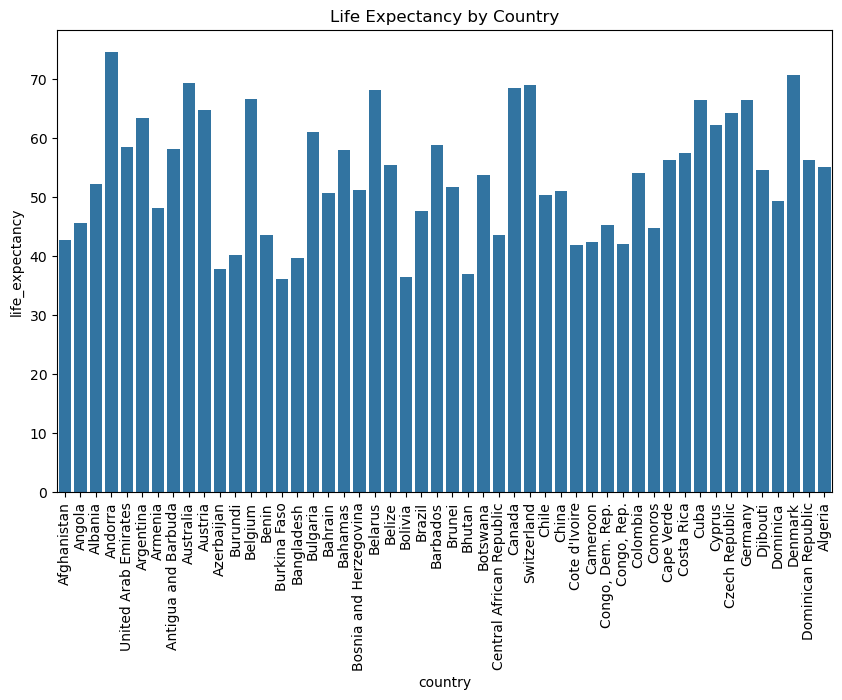

In [23]:
# which of the facts can be plotted?
# life expectancy by country

# Let's plot the life expectancy by country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='life_expectancy', data=df)
plt.xticks(rotation=90)
plt.title('Life Expectancy by Country')
plt.show()


In [18]:
# Average life expectancy group by country and year
column_names = result.keys()

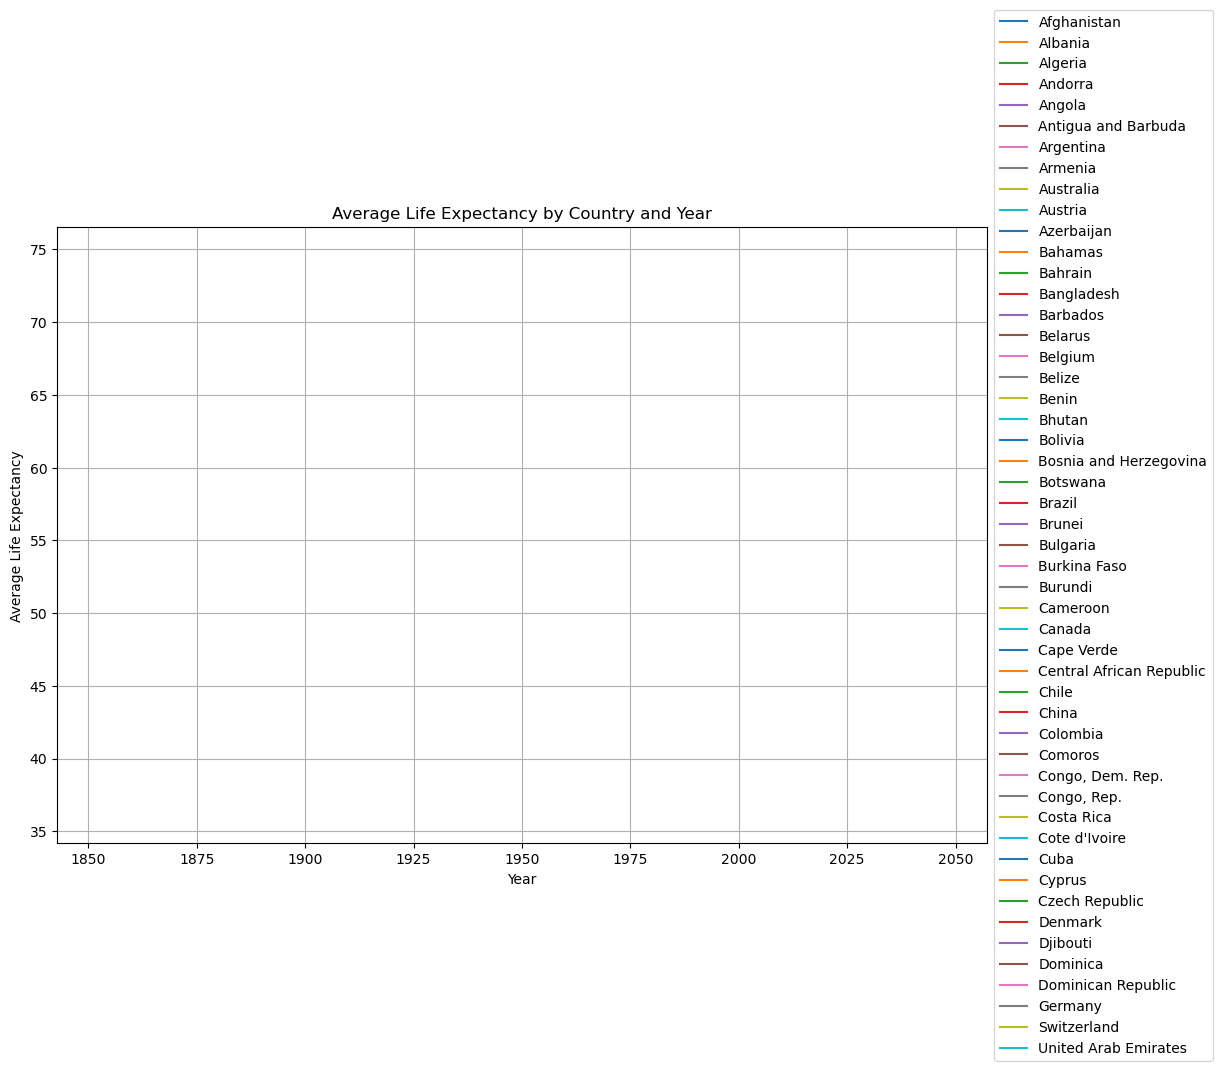

In [24]:
# Create the DataFrame using the actual column names
df = pd.DataFrame(data, columns=column_names) 

# Calculate average life expectancy for each country and year
df_avg = df.groupby(['country', 'year'])['life_expectancy'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for country in df_avg['country'].unique():
    df_country = df_avg[df_avg['country'] == country]
    plt.plot(df_country['year'], df_country['life_expectancy'], label=country)

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country and Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.grid(True)
plt.show()